<a href="https://colab.research.google.com/github/jhmartel/fp/blob/master/_notebooks/2022-04-20-MillionaireGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yao's Millionaire's Problem. Part 1. 

> " We begin the study of Yao's Millionaire Problem, approaching via convex analysis. Two players have secret points, and the first player to guess an affine function separating the secrets wins. The question is whether the optimal strategy is uniform on the domain, or whether there is some variation in the density. This is elaborated below using both python and some elementary convex analysis."

- toc: false
- branch: master
- badges: false
- comments: true
- categories: [millionaire, secret, convex analysis]
- hide: false




The purpose of this article is to investigate whether there is strategy or skill possible in the following variation of [Yao's "Millionaire Problem"](https://en.wikipedia.org/wiki/Yao%27s_Millionaires%27_problem).

Here is the game. We have a huge grid $\mathbf{R}^2$. Now let two players $A,B$ have secret locations $s_A=(x_A, y_A)$ and $s_B=(x_B, y_B)$. These secrets are _points_ in the euclidean plane $\mathbf{R}^2$. 

Now the players $A, B$ are going to take turns guessing affine functions (or affine lines in $\mathbf{R}^2$) and the first player to guess an affine function which separates the secrets wins! 

The gameplay is something like this: The players $A,B$ take turns. If player $A$ goes first, then player $A$ chooses an affine function $\ell$ on $\mathbf{R}^2$, and asks player $B$ to reply with the sign of $\ell(s_B)$. We require that $B$ replies honestly with $sgn(\ell(s_B))$. This is the end of player $A$'s turn. If $\ell$ separates the secrets, then player A wins. Otherwise it's player B's turn. Next player $B$ chooses an affine function $\ell'$, and asks player $A$ to reply with the sign of $\ell'(s_A)$. Once player $A$ replies, then this is the end of player $B$'s turn. Again, if $\ell'$ separates the secrets, then player B wins. Otherwise it's player A's turn.

The object of the game is to determine an affine function $\ell$ which separates the secrets, i.e. for which $ sgn(\ell(s_A)) \neq sgn(\ell(s_B)).$ The first player to demonstrate an affine function which separates the secrets wins!

Our interest is to find optimal strategies for this game. Firstly, we have to consider whether there is _any_ strategy possible. For example, can player $A$ use the cumulative history of both player $A$ and $B$'s affine guesses to better inform their next guess? For example, if player $A$ guesses an affine function $\ell$ which does not separate, then player $B$ can use the knowledge of their own private secret to determine which halfspace contains $s_A$. And indeed, by the same reasoning player $A$ can use their knowledge of $s_A$ to likewise determine which halfspace contains $s_B$. So obviously the initial distribution $d\lambda$ is updated to the restricted distribution $d\lambda\cdot 1_H$, where $H$ is the halfspace defined by $\ell$ and containing $s_A, s_B$. With successive guesses, the distribution becomes a descending chain of closed convex sets, namely the intersection of successive halfspaces, having the form $$d\lambda \leadsto d\lambda \cdot 1_H \leadsto d\lambda \cdot 1_H 1_{H'} \leadsto d\lambda \cdot 1_H 1_{H'} 1_{H''} \leadsto \cdots. $$

The notation is somewhat strange, but simply expresses that we remain uncertain of the specific location of the secrets $s_A, s_B$, except we know the possibly location is becoming more restricted. 


In the millionaire game, the players $A,B$ have an interest in _privacy_. Their secrets $s_A, s_B$ are intended to be _secret_. This means the players $A,B$ might not choose affine functions which potentially reveal information about their own secrets. In practice this means players determined to maintain their privacy will always choose affine functions which do not bound compact convex sets. Similarly, an opponent will not readily choose affine functions which separates the domain into a bounded component, since the probability that the opponent's secret lies in the bounded component is relatively small, while the probability of its lying in the unbounded component is much greater. 

The subject of so-called _zero knowledge proofs_ in cryptography is related to the millionaires problem. Here we try to find a balance where the players can choose to reveal as much as they wish of their own balances, while their own guesses are signals/indications in-themselves of the secret balance.

Our question is whether there is any strategy or skill in this game. What is the optimal strategy? Can the player use the knowledge of the opponent's affine functions to improve their own selection of affine function??

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Now we simulate the millionaire problem on the euclidean two-dimensional plane.
# For convenience we rename the players $A,B$ as players $+1, -1$, respectively. 
# for testing purposes we suppose the players A,B have secrets below:

#s_A=input("What is player A's secret position?")
s_A=[16,0]
s_A=np.array(s_A)

#s_B=input("What is player B's secret position?")
s_B=[0, 0.2]
s_B=np.array(s_B)


# now we define some basic functions, i.e. to compute affine functions based on
# their normal n and height b.
def affine(n,x,b):
    n=np.array(n)
    x=np.array(x)
   # return n.dot(x)+b
    return n[0]*x[0]+n[1]*x[1] + b


# to protect the secret we really only need the sign of the affine function.
def sign(x_Real):
    if x_Real<0: 
        return -1
    else:
        return +1

# here t defines the test function, which is True iff the affine function 
# separates the secrets. 
def t(n,b):
    n=np.array(n)
    if sign(affine(n,s_A,b)) != sign(affine(n,s_B, b)):
         return True
    else:
         return False



 Player 1's turn to play:
Given the history [] choose your affine function:
1
1
0
Fail! Player 1 has failed to separate the secrets... End of turn.


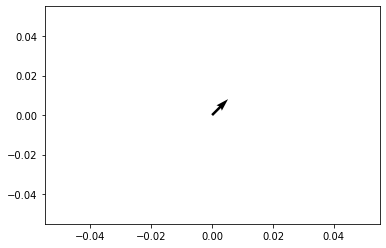


 Player -1's turn to play:
Given the history [[1.0, 1.0, 0.0]] choose your affine function:
3
1
0
Fail! Player -1 has failed to separate the secrets... End of turn.


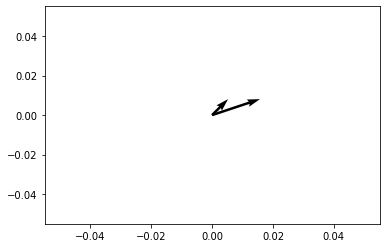


 Player 1's turn to play:
Given the history [[1.0, 1.0, 0.0], [3.0, 1.0, 0.0]] choose your affine function:
1
4
0
Fail! Player 1 has failed to separate the secrets... End of turn.


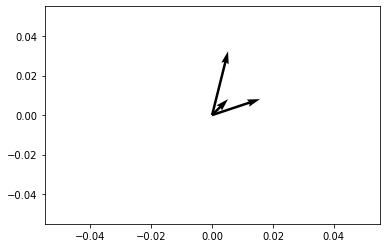


 Player -1's turn to play:
Given the history [[1.0, 1.0, 0.0], [3.0, 1.0, 0.0], [1.0, 4.0, 0.0]] choose your affine function:
-3
0
-5
Fail! Player -1 has failed to separate the secrets... End of turn.


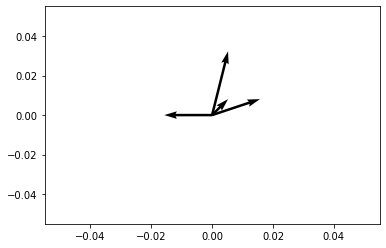


 Player 1's turn to play:
Given the history [[1.0, 1.0, 0.0], [3.0, 1.0, 0.0], [1.0, 4.0, 0.0], [-3.0, 0.0, -5.0]] choose your affine function:
1
-1
0
Winner! Player 1 has separated the secrets with [1.0, -1.0, 0.0]. End of Game!


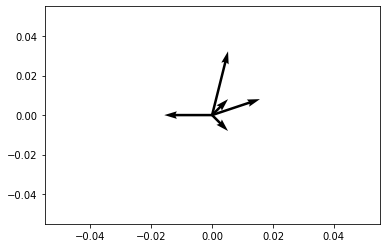

In [112]:
# Now we setup the basic routine, i.e. sequence of gameplay.

outcome=False
history=[]
vector_history=[]
player=+1
i=0
color=[]


while outcome == False:
    print("\n Player " + str(player) + "'s turn to play:" )
    print("Given the history " + str(history) + " choose your affine function:")     
    
    n0 = float(input())
    n1 = float(input())
    b = float(input())
    history = history + [[n0, n1, b]]
    vector_history = vector_history+[[n0,n1]] 
    i=i+1


    if t([n0, n1], b) == True:
        outcome = True
        print("Winner! Player " + str(player)+ " has separated the secrets with " + str([n0, n1, b]) + ". End of Game!")
    else:
        print("Fail! Player " + str(player) + " has failed to separate the secrets... End of turn.")
        player=player*(-1)

    

# the following plots the various normals chosen by the players, but we would
# prefer to have the half spaces. 
    V=np.array(vector_history)
    origin=np.array([[0]*i, [0]*i])
    plt.quiver(*origin, V[:,0], V[:,1], scale=21)
    plt.show()          


The above is a very simple gameplay, where it happens by chance that the two points can be separated by a flat strip, namely the space between two parallel halfspaces. We included the above simply as an example. 

[To Do:]
1. Use matplotlib to plot the halfspaces, and not simply the normal vector, which is what we have above.

2. Determine some automatic routine to compete with a human opponent.

3. The millionaire's problem implicitly assumes the players $A,B$ have large funds, i.e. enough to pay for a dinner! Therefore we might need assume our secrets $s_A, s_B$ are sufficiently far from the origin. (?) 

4. If the domain is essentially infinite, then a certain amount of privacy will always be maintained, because it's better to bisect the unknown into two halfspaces of equal (possibly infinite) area. If the affine function indeed separates the secrets, then the position of that secret is only known to occupy an infinite area domain, and thus essentially remains private in a restricted sense. Although of course the _direction_ of the secret, and not necessarily its magnitude will be better known to the opponent, i.e. there will be a definite reduction of uncertainty in the direction of the opponents secret, but not necessarily a reduction in uncertainty in its magnitude.

If an opponent proposes an affine function which separates the domain into a bounded and unbounded component, then that is huge risk for the player, i.e. it's unlikely that the small bounded domain (chosen at random) will contain the secret  as opposed to the infinite domain. At the risk of belabouring the point: a random infinite domain is more likely to contain an unknown secret than a compact domain. We find this an interesting point...

In [114]:
# hide

print(history)

[[1.0, 1.0, 0.0], [3.0, 1.0, 0.0], [1.0, 4.0, 0.0], [-3.0, 0.0, -5.0], [1.0, -1.0, 0.0]]


In [144]:
# hide

prehistory = history[:-1]
signs=[]
sph=[]

for x in prehistory:
    epsilon=sign(affine([x[0], x[1]], s_A, x[2]))
    signs=signs+[epsilon]
    sph=sph+[epsilon*np.array(x)]

sph=np.array(sph)
print(sph)
print(type(sph))

#print(prehistory)
#print(type(prehistory))
#print(sph)    


[[ 1.  1.  0.]
 [ 3.  1.  0.]
 [ 1.  4.  0.]
 [ 3. -0.  5.]]
<class 'numpy.ndarray'>


In [130]:
#hide

import numpy as np
P=2.45
S=[22, 33, 45.6, 21.6, 51.8]
SP = P*np.array(S)
print(SP)

[ 53.9   80.85 111.72  52.92 126.91]


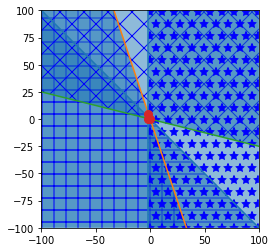

In [150]:
from scipy.spatial import HalfspaceIntersection

prehistory = history[:-1]
signs=[]
sph=[]

for x in prehistory:
    epsilon=sign(affine([x[0], x[1]], s_A, x[2]))
    signs=signs+[epsilon]
    sph=sph+[epsilon*np.array(x)]

sph=np.array(sph)
print(sph)
print(type(sph))

#history=np.array(history)
#prehistory=history[:-1]

# for illustration we have the secret s_A as feasible_point.
# its interesting question to select a feasible point which 
# does not reveal too much information about the secrets... 
# but obviously any point on the convex hull formed by the secrets s_A, s_B 
# will be a feasible point. But there are many more choices, so which choice reveals
# the least information about the secrets s_A, s_B ? I.e. which feasible point can be chosen
# which reveals the least information about s_A, s_B? 

feasible_point = np.array([16.0, 0.0])

halfspaces = sph*(-1)


# we need reverse-signs to align with the convention in qhull that 
# the halfspaces are defined by the inequality Ax+b <= 0.
hs = HalfspaceIntersection(halfspaces, feasible_point)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot('111', aspect='equal')
xlim, ylim = (-100, 100), (-100, 100)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
x = np.linspace(-100, 100, 1000)
symbols = ['-', '+', 'x', '*']
signs = [0, 0, -1, -1]
fmt = {"color": None, "edgecolor": "b", "alpha": 0.5}
for h, sym, sign in zip(halfspaces, symbols, signs):
    hlist = h.tolist()
    fmt["hatch"] = sym
    if h[1]== 0:
        ax.axvline(-h[2]/h[0], label='{}x+{}y+{}=0'.format(*hlist))
        xi = np.linspace(xlim[sign], -h[2]/h[0], 1000)
        ax.fill_between(xi, ylim[0], ylim[1], **fmt)
    else:
        ax.plot(x, (-h[2]-h[0]*x)/h[1], label='{}x+{}y+{}=0'.format(*hlist))
        ax.fill_between(x, (-h[2]-h[0]*x)/h[1], ylim[sign], **fmt)
x, y = zip(*hs.intersections)
ax.plot(x, y, 'o', markersize=8)